In [ ]:
#@title Imports { run: "auto", display-mode: "code" }
import datetime as dt
from datetime import timedelta

# Manipulação de Dados
import numpy as np
import pandas as pd 

# Plots
import matplotlib.pyplot as plt

# Machine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Tensor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

FUNCTIONS


In [ ]:
#SMA
def SMA(dados, day):
    y_hat_SMA = dados['Close'].rolling(window=day).mean()
    return y_hat_SMA

def CMA(dados, day):
    y_hat_CMA = dados['Close'].expanding(min_periods=day).mean()
    return y_hat_CMA

def define_test(dados, pct_treino):
    # Definir quantos porcento queremos pra treino
    
    # Definir o primeiro dia, o último e o total de dias nos nossos dados
    primeiro_dia = min(dados.index)
    ultimo_dia = max(dados.index)
    total_dias = (ultimo_dia - primeiro_dia).days
    
    # "Dias de treino, dias de glória" - Charlie Brown Jr
    dias_treino = np.ceil(total_dias * pct_treino)
    dias_teste = np.floor(total_dias * (1 - pct_treino))
    
    # Data em que o treino deve parar
    data_parada = primeiro_dia + timedelta(days=dias_treino)
    
    # Dividir o dataset usando a data de parada do treino
    dados_treino = dados[:data_parada] # do começo à data de parada
    dados_teste = dados[data_parada:] # da data de parada ao final
    
    return dados_treino, dados_teste, data_parada

#RETORNA UM DATAFRAME COM OS VALORES FORMATADOS
def fit_df_transform(df):
  scaler = StandardScaler()
  scaler = scaler.fit_transform(df)
  return scaler

def format_simetrical_lstm(df, steps = 1):
  dataX, dataY = [],[]
  for i in range(len(df) - steps -1):
    a = df[i:(i+steps),0]
    dataX.append(a)
    dataY.append(df[i + steps,0])
  return np.array(dataX), np.array(dataY)

In [ ]:
#LOAD DATAFRAMES
df_azul4 = pd.read_excel(f"/azul4.xlsx")
df_petr4 = pd.read_excel(f"/petr4.xlsx")
df_taee11 = pd.read_excel(f"/taee11.xlsx")


SHOW DATAFRAMES

In [ ]:
#AZUL4
df_azul4['Date'] = pd.to_datetime(df_azul4['Date'])
df_azul4 = df_azul4.set_index('Date')
df_azul4.describe()

,High,Low,Open,Close,Volume,Adj Close
count,742.000000,742.000000,742.000000,742.000000,7.420000e+02,742.000000
mean,35.081321,33.595997,34.406577,34.363801,6.169784e+06,34.363801
std,12.259059,12.113160,12.212681,12.238259,8.438396e+06,12.238259
min,11.830000,8.740000,9.800000,10.350000,0.000000e+00,10.350000
25%,24.617500,23.549999,24.129999,24.027500,1.562125e+06,24.027500
50%,34.120001,33.035000,33.660000,33.620001,2.668500e+06,33.620001
75%,43.290001,41.459999,42.287499,42.187501,8.027125e+06,42.187501
max,62.869999,61.270000,62.549999,62.410000,6.886580e+07,62.410000


In [ ]:
#PETR4
df_petr4['Date'] = pd.to_datetime(df_petr4['Date'])
df_petr4 = df_petr4.set_index('Date')
df_petr4.describe()

,High,Low,Open,Close,Volume,Adj Close
count,742.000000,742.000000,742.000000,742.000000,7.420000e+02,742.000000
mean,23.892089,23.179704,23.552857,23.523720,6.496028e+07,15.206919
std,4.275200,4.347628,4.311312,4.315172,3.294650e+07,2.933281
min,12.180000,10.850000,11.070000,11.290000,0.000000e+00,7.526503
25%,20.355000,19.770000,20.092500,20.080000,4.334022e+07,12.992081
50%,24.490000,23.405001,23.974999,23.865000,5.664920e+07,15.474142
75%,27.422500,26.802500,27.095000,27.059999,7.592078e+07,17.556731
max,31.240000,30.500000,30.889999,30.969999,2.548138e+08,20.539553


In [ ]:
#TAEE11
df_taee11['Date'] = pd.to_datetime(df_taee11['Date'])
df_taee11 = df_taee11.set_index('Date')
df_taee11.describe()


,High,Low,Open,Close,Volume,Adj Close
count,742.000000,742.000000,742.000000,742.000000,7.420000e+02,742.000000
mean,25.945000,25.396523,25.689515,25.670579,1.866831e+06,18.991087
std,4.023894,3.975128,4.004395,4.000782,1.520265e+06,4.323917
min,18.520000,17.950001,18.209999,18.090000,0.000000e+00,12.066737
25%,21.677500,21.155000,21.432500,21.412500,1.117675e+06,13.911794
50%,27.054999,26.255000,26.695000,26.740001,1.596600e+06,19.832260
75%,28.767500,28.240000,28.520000,28.487500,2.261025e+06,22.574292
max,34.369999,33.750000,34.060001,33.889999,3.267440e+07,28.827721


BASIC PLOTS

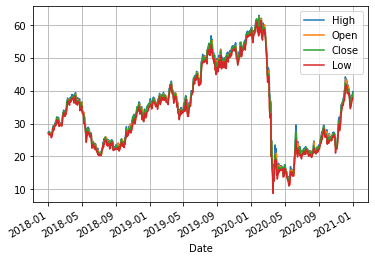

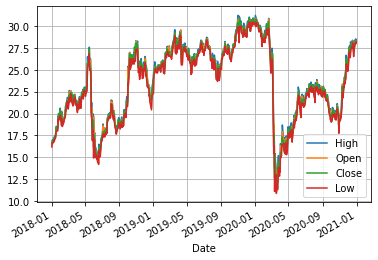

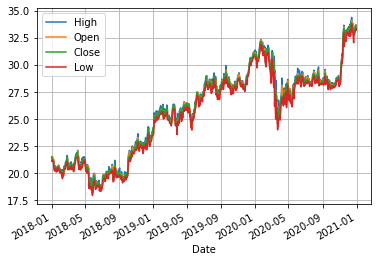

In [ ]:
#Plot DATAFRAMES
df_azul4[['High','Open','Close','Low']].plot(grid = True)
df_petr4[['High','Open','Close','Low']].plot(grid = True)
df_taee11[['High','Open','Close','Low']].plot(grid = True)


CLEANING DATABASE

In [ ]:
#AZUL4 - NULL VALUES CHECK
df_azul4.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [ ]:
df_azul_zero = df_azul4['Volume'] == 0
print(df_azul_zero.sum())
df_azul4 = df_azul4[~df_azul_zero]

1


In [ ]:
#PETR4 - NULL VALUES CHECK
df_petr4.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [ ]:
df_petr4_zero = df_petr4['Volume'] == 0
print(df_petr4_zero.sum())
df_petr4 = df_petr4[~df_petr4_zero]

1


In [ ]:
#TAEE11 - NULL VALUES CHECK
df_taee11_zero = df_taee11['Volume'] == 0
print(df_taee11_zero.sum())
df_taee11 = df_taee11[~df_taee11_zero]


1


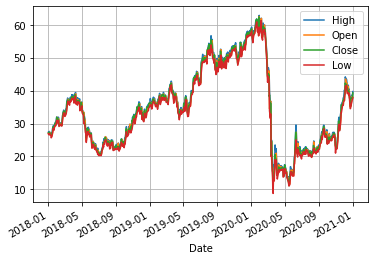

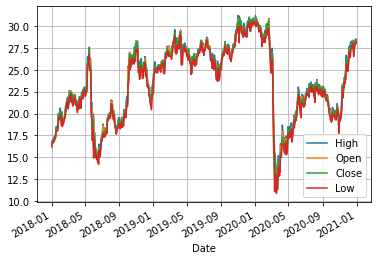

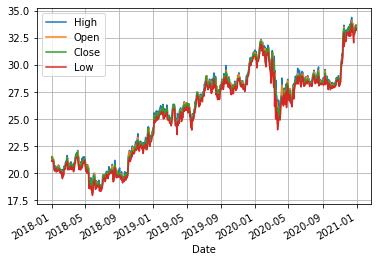

In [ ]:
#Plot DATAFRAME CLEANED
df_azul4[['High','Open','Close','Low']].plot(grid = True)
df_petr4[['High','Open','Close','Low']].plot(grid = True)
df_taee11[['High','Open','Close','Low']].plot(grid = True)

**TESTES OF TAEE11**

DEFINITIONS


In [ ]:
#SEPARANDO DADOS DE MODELO E TESTE

df_taee11_trainer, df_taee11_test, df_taee11_stop_day = define_test(dados=df_taee11['Close'],pct_treino=0.75)



SMA (SIMPLE MOVING AVERAGE)

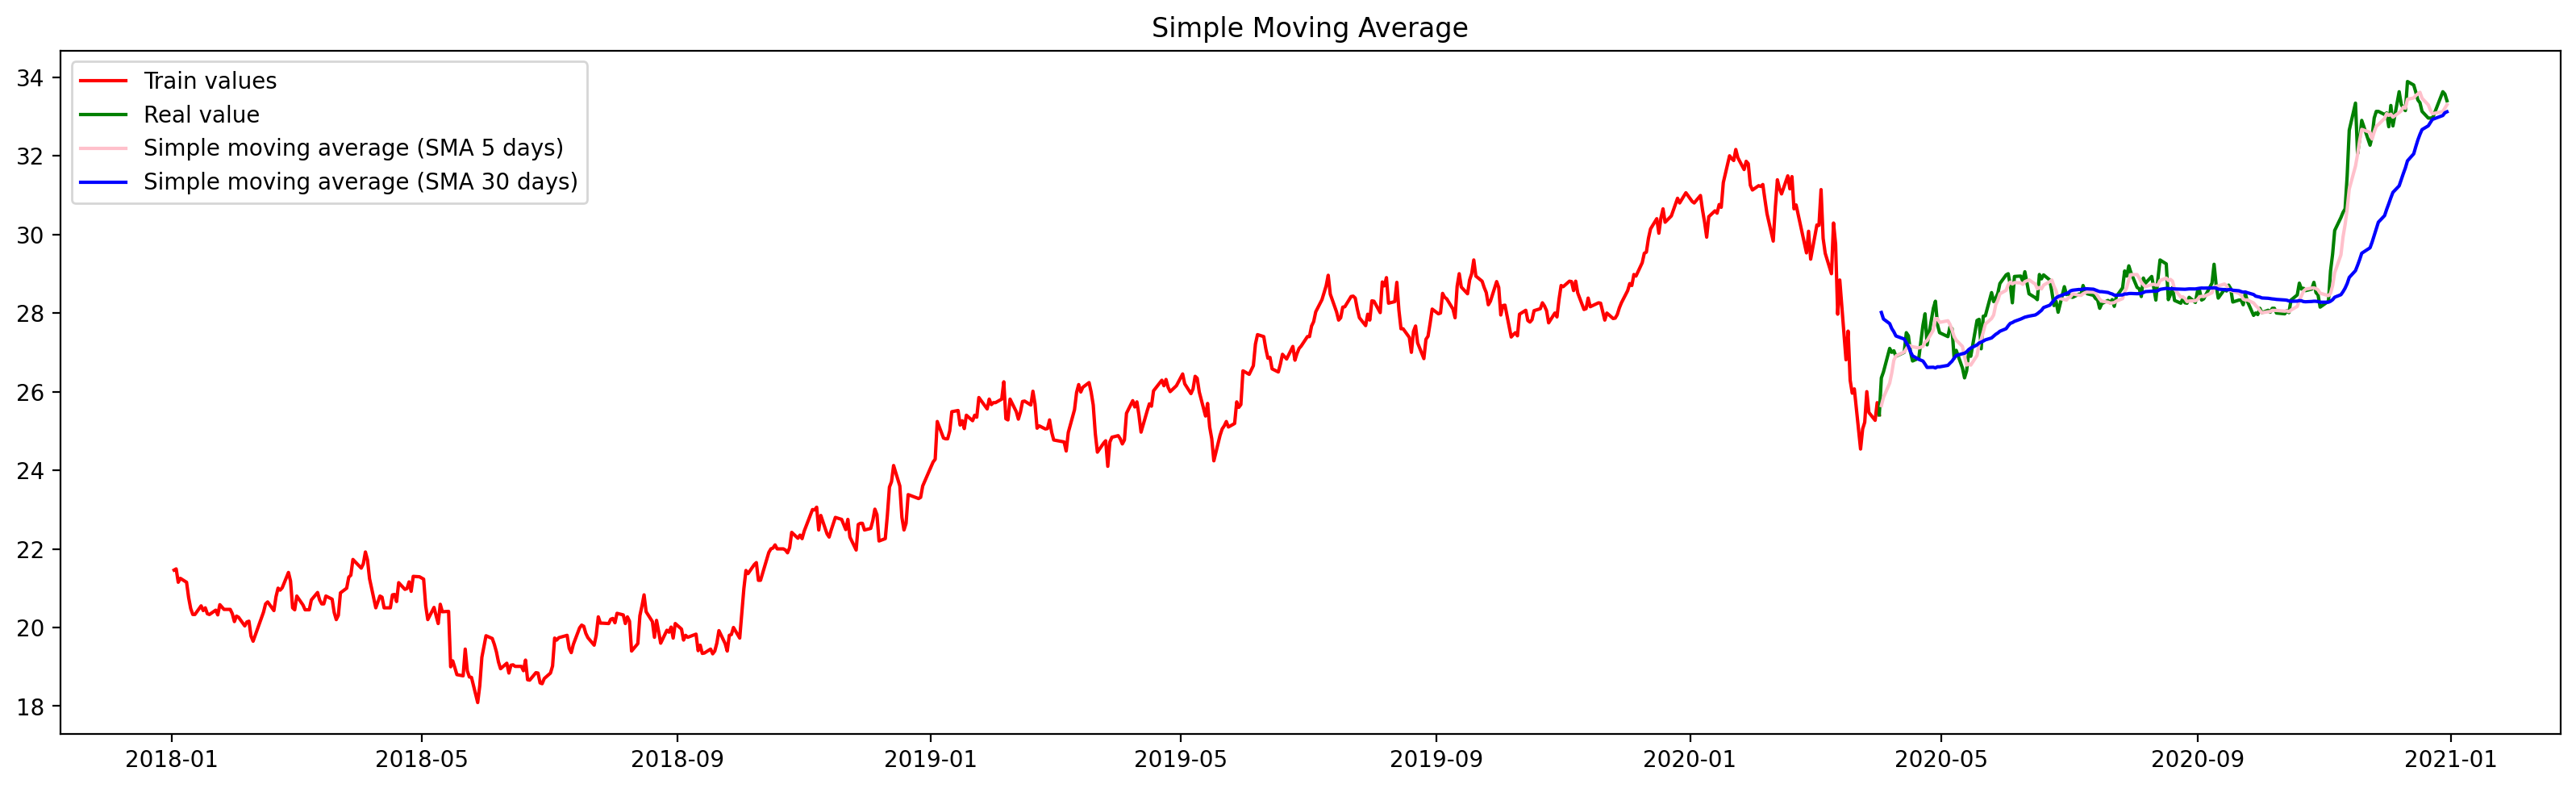

In [ ]:
days_of_sma_analysis = [5,30]
colors = ['pink','blue','yellow','black']
%config InlineBackend.figure_format ='retina' 

with plt.style.context('default'):
    # Configurações básicas
    plt.figure(figsize=(20, 5.5))
    plt.title("Simple Moving Average")
    
    # Dados reais
    plt.plot(df_taee11_trainer, label='Train values', color='red')
    plt.plot(df_taee11_test, label='Real value',color='green')
    sizeplot = len(df_taee11_trainer) 

    
    # Moving average
    for i, day in enumerate(days_of_sma_analysis):
        y_hat_sma_taee11 = SMA(df_taee11, day)
        print()
        plt.plot(y_hat_sma_taee11[sizeplot:], label=f'Simple moving average (SMA {day} days)', color=colors[i]) 
        
      
    # Configurações básicas
    plt.legend()
    plt.show()